Ссылка на датасет - https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?resource=download

Цель:
Разработка алгоритма определения цены автомобиля, по параметрам которые присутствуют в данных

In [154]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns


In [155]:
df = pd.read_csv('archive/bmw.csv')


In [3]:
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


Разделим данные на обучающую и тестовая выборки(train and test)

In [156]:
train, test = train_test_split(df, random_state=42)
#random_state указывается, чтобы выборки не менялись при перезапуске


In [157]:
train


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
930,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0
4052,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5
1197,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0
7893,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0
7571,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5
...,...,...,...,...,...,...,...,...,...
5734,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0
5191,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0
5390,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0
860,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0


In [158]:
test


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5
...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0


In [159]:
len(test) / len(df)


0.2500695668305352

На тестовые данные выделено 25% данных

In [160]:
df.isna().mean()


model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

Пропусков в данных нет

Посмотрим на распределение стоимости автомобилей

<Axes: >

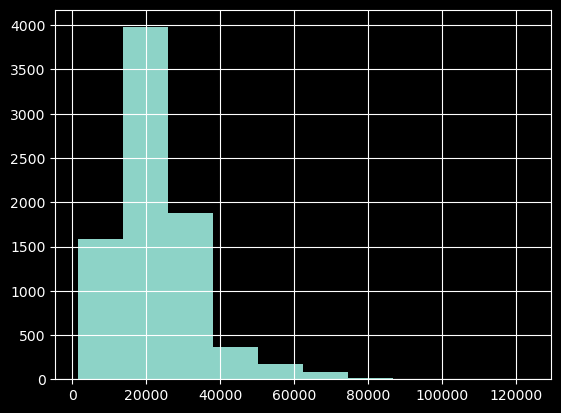

In [161]:
train['price'].hist()


In [162]:
train['price'].describe()


count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

Медианная стоимость автомобилей в районе 20 000, но есть авто, которые стоят дороже 120 000

Посмотрим на взаимосвязь между годом авто и его ценой

In [163]:
train.groupby('year')['price'].agg(['count', 'mean', 'median'])


,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,3,3980.000000,3995.0
2000,1,1550.000000,1550.0
2001,3,7333.333333,5950.0
2002,4,3893.500000,3494.5
2003,2,9222.500000,9222.5
2004,7,7932.857143,3495.0


<Axes: xlabel='year'>

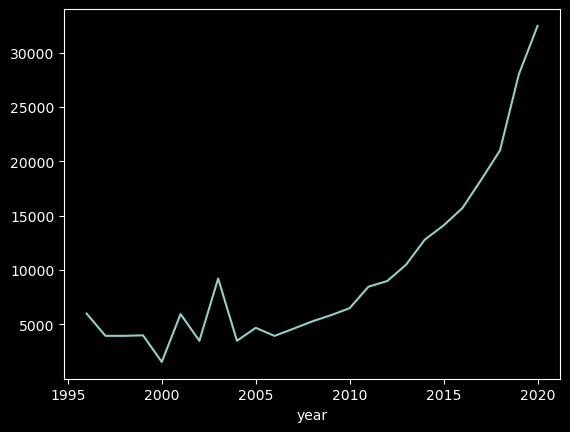

In [164]:
train.groupby('year')['price'].median().plot()


На графике мы можем видеть, что чем новее авто, тем оно дороже

Возьмем за baseline медианное значение стоимости, от которого будем стараться улучшить точность модели

In [165]:
train['price_pred_median'] = train['price'].median()


Посмотрим среднее отклнение медианной стоимости автомобилей от фактической стоимости

In [166]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [167]:
def error(y_true, y_pred):
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))


In [168]:
error(train['price'], train['price_pred_median'])


8220.5146567718
0.41711111879393314


Модель на тренировочных данных ошибается в среднем на 41.7%, что очень много:)

Посмотрим на ошибку на тестовых данных

In [169]:
test['price_pred_median'] = train['price'].median()


In [170]:
error(test['price'], test['price_pred_median'])


8211.845697329376
0.409212791738344


На тестовых данных получаем примерно такой же результат

Алгоритм на основе года

Создадим модель со средней стоимостью авто по годам

In [171]:
model_year_mean = train.groupby('year')['price'].mean().reset_index()


In [172]:
model_year_mean


,year,price
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3980.000000
4,2000,1550.000000
5,2001,7333.333333
6,2002,3893.500000
7,2003,9222.500000
8,2004,7932.857143
9,2005,5390.166667


In [173]:
model_year_mean.columns = (['year', 'price_pred_year_mean'])
#Переименуем price, чтобы названия колонок не задвоились


Примержим модель к train

In [174]:
train = train.merge(model_year_mean, how = 'left', on = 'year')


Посмотрим на результат

Прошлый результат

In [175]:
error(train['price'], train['price_pred_median'])


8220.5146567718
0.41711111879393314


Результат со средней стоимостью по годам

In [176]:
error(train['price'], train['price_pred_year_mean'])


5474.243598515644
0.2447228468704618


Средняя ошибка снизилась с 8220.5 до 5474.2

Посмотрим результат на test

In [177]:
test = test.merge(model_year_mean, how = 'left', on = 'year')
#мерджим модель к test


Посмотрим не появились ли пропуски

In [178]:
test.isna().mean()


model                   0.0
year                    0.0
price                   0.0
transmission            0.0
mileage                 0.0
fuelType                0.0
tax                     0.0
mpg                     0.0
engineSize              0.0
price_pred_median       0.0
price_pred_year_mean    0.0
dtype: float64

In [179]:
error(test['price'], test['price_pred_median'])


8211.845697329376
0.409212791738344


In [180]:
error(test['price'], test['price_pred_year_mean'])


5426.271071211102
0.23933940428873632


На test мы также получаем значительное улучшение относительно базовой модели

Создадим модель со медианной стоимостью авто по годам

In [182]:
model_year_median = train.groupby('year')['price'].median().reset_index()


In [183]:
model_year_median = model_year_median.rename({'price' : 'price_pred_year_median'}, axis = 1)


In [184]:
model_year_median


,year,price_pred_year_median
0,1996,5995.0
1,1997,3950.0
2,1998,3950.0
3,1999,3995.0
4,2000,1550.0
5,2001,5950.0
6,2002,3494.5
7,2003,9222.5
8,2004,3495.0
9,2005,4685.0


In [185]:
train = train.merge(model_year_median, how = 'left', on = 'year')


Последний результат

In [187]:
error(train['price'], train['price_pred_year_mean'])


5474.243598515644
0.2447228468704618


In [188]:
error(train['price'], train['price_pred_year_median'])


5232.327891156463
0.21723436816638503


Медиана позволила нам улучшить качество с 5474.2 до 5232.3

Теперь посмотрим результат для test

In [189]:
test = test.merge(model_year_median, how = 'left', on = 'year')


In [190]:
error(test['price'], test['price_pred_year_mean'])


5426.271071211102
0.23933940428873632


In [192]:
error(test['price'], test['price_pred_year_mean'])


5426.271071211102
0.23933940428873632


In [191]:
mean_absolute_error(test['price'], test['price_pred_year_median'])


5240.677299703264

На test также результ также немного улучшился

Для того, чтобы улучшим модель добавим еще одну переменную

Проверим взаимосвязь между объемом двигателя и стоимостью

In [49]:
train.groupby('engineSize')['price'].agg(['count', 'mean', 'median']).reset_index()


,engineSize,count,mean,median
0,0.0,32,18469.906250,18250.0
1,0.6,6,17973.333333,18200.0
2,1.0,1,17400.000000,17400.0
3,1.5,1146,17104.345550,15881.5
4,1.6,75,9230.240000,8890.0
5,1.9,5,3968.000000,3950.0
6,2.0,4925,20697.721624,19792.0
7,2.2,4,6010.000000,3972.5
8,2.5,8,4532.375000,3892.5
9,2.8,1,5995.000000,5995.0


<Axes: xlabel='engineSize'>

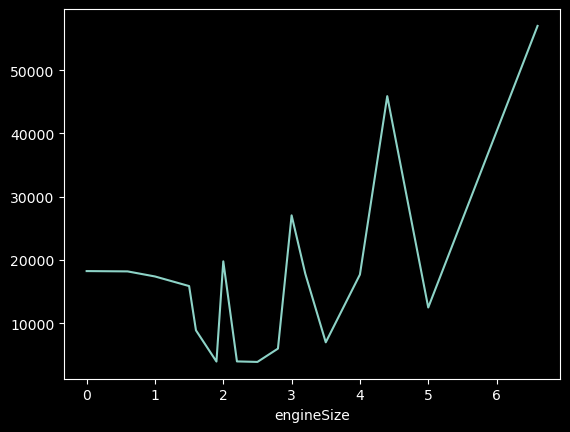

In [194]:
train.groupby('engineSize')['price'].median().plot()


Взаимосвязь есть, поэтому можем включать показатель объема двигателя в нашу модель, что должно улучшить точность предикта

Разделим показатель объема двигателя на группы

In [196]:
def engine_group(x):
    if x <=1.5:
        return '<=1.5'
    if x <=2:
        return '<=2'
    return '>2'


Применим функцию к train

In [197]:
train['engine_group'] = train['engineSize'].apply(engine_group)


In [198]:
train


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,20022.0,11041.347826,10490.0,<=2
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,20022.0,31066.986143,27980.0,<=1.5
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,20022.0,15086.536313,14103.5,>2
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,20022.0,31066.986143,27980.0,<=2
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,20022.0,15086.536313,14103.5,<=1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2018,17995,Semi-Auto,40456,Diesel,145,64.2,2.0,20022.0,22562.450394,21000.0,<=2
8081,1 Series,2016,19950,Semi-Auto,23210,Petrol,200,39.8,3.0,20022.0,16531.655222,15699.5,>2
8082,X2,2019,25450,Semi-Auto,5652,Diesel,145,47.9,2.0,20022.0,31066.986143,27980.0,<=2
8083,X1,2016,19850,Semi-Auto,14542,Diesel,125,60.1,2.0,20022.0,16531.655222,15699.5,<=2


In [199]:
train.groupby('engine_group')['price'].agg(['count', 'mean', 'median'])


,count,mean,median
engine_group,,,
<=1.5,1185,17145.870886,15980.0
<=2,5005,20509.168232,19499.0
>2,1895,31826.479683,27500.0


Строим модель и мерджим ее к train

In [200]:
model_year_engine_median = train.groupby(['year','engine_group'])['price'].median().reset_index()


In [201]:
model_year_engine_median = model_year_engine_median.rename({'price' : 'price_pred_year_engine_median'}, axis = 1)


In [202]:
train = train.merge(model_year_engine_median, how = 'left', on = ['year', 'engine_group'])


Посмотрим на результат

In [206]:
error(train['price'], train['price_pred_year_median'])    # Результат без показателя объема двигателя


5232.327891156463
0.21723436816638503


In [207]:
error(train['price'], train['price_pred_year_engine_median']) # Результат с показателем объема двигателя


3659.774273345702
0.1582922021242831


На train результат значительно улучшился

Посмотрим на test

Применим функцию к test

In [208]:
test['engine_group'] = test['engineSize'].apply(engine_group)


Примержим модель по двум переменным

In [209]:
test = test.merge(model_year_engine_median, how = 'left', on = ['year','engine_group'])


После присоединения модели проверим на пропуски

In [210]:
test.isna().mean()


model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_median    0.000742
dtype: float64

В данных появились пропуски из-за того, что в test вероятно есть автомобиль, с такими характеристиками года и объема двигателя, которых не было в train

In [211]:
test[test['price_pred_year_engine_median'].isna()]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_median
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,20022.0,3980.0,3995.0,>2,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,20022.0,1550.0,1550.0,<=2,NaN


Да, есть 2 таких автомобиля. Так как таких авто всего 2, поэтому мы без потерь в качестве можем просто не учитывать эти авто в дальнейшем

Скорипуем test без пропусков

In [214]:
test_no_nan = test.dropna().copy()


In [217]:
error(test['price'], test['price_pred_year_median']) # Результат без показателя объема двигателя


5240.677299703264
0.21478293590399475


In [216]:
error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median']) # Результат с показателем объема двигателя


3790.014291017075
0.16270961023342095


На test результат получился также намного лучше, но немного хуже чем на train

Улучшение модели

Следующим шагом может быть добавление типа трансмиссии в модель. 

In [218]:
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])


,count,mean,median
transmission,,,
Automatic,2698,22413.452187,19392.0
Manual,1925,14557.851429,13450.0
Semi-Auto,3462,27377.835066,24990.0


In [219]:
model_year_engine_median


,year,engine_group,price_pred_year_engine_median
0,1996,>2,5995.0
1,1997,<=2,3950.0
2,1998,<=2,3950.0
3,1999,<=2,3995.0
4,2000,>2,1550.0
5,2001,<=1.5,13000.0
6,2001,>2,4500.0
7,2002,<=2,3999.0
8,2002,>2,2990.0
9,2003,>2,9222.5


In [220]:
train.groupby('year')['price'].agg(['count', 'median'])


,count,median
year,,
1996,1,5995.0
1997,1,3950.0
1998,1,3950.0
1999,3,3995.0
2000,1,1550.0
2001,3,5950.0
2002,4,3494.5
2003,2,9222.5
2004,7,3495.0


Но модель уже достаточно большая и мы получим пропуски, так как автомобилей до 2010 года совсем мало. Поэтому сначала объединим авто в группы: до 2010 года и далее с шагом в 2 года.

In [221]:
train['year_group'] = pd.cut(train['year'], [0, 2010,2012,2014,2016,2018,float('inf')])


In [222]:
train.groupby('year_group')['price'].agg(['count', 'median'])


,count,median
year_group,,
"(0.0, 2010.0]",124,5584.0
"(2010.0, 2012.0]",129,8985.0
"(2012.0, 2014.0]",637,11695.0
"(2014.0, 2016.0]",2114,15080.5
"(2016.0, 2018.0]",1931,19370.0
"(2018.0, inf]",3150,28867.5


Создадим модель и примерджим модель к train

In [223]:
model_year_engine_group_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()


In [224]:
model_year_engine_group_median = model_year_engine_group_median.rename({'price' : 'pred_price_year_engine_group_median'},axis = 1)


In [225]:
train = train.merge(model_year_engine_group_median, how = 'left', on = ['year_group', 'engine_group'])


Сравним результат

In [226]:
error(train['price'], train['price_pred_year_engine_median'])


3659.774273345702
0.1582922021242831


In [227]:
error(train['price'], train['pred_price_year_engine_group_median'])


3827.4336425479282
0.1693848259731495


Мы совсем немного потеряли в качестве, но теперь будет проще улучшать модель, добавим трансмиссию

Создаем модель с трансмиссией

In [228]:
model_year_engine_trn_group_median = train.groupby(['year_group', 'engine_group', 'transmission'])['price'].median().reset_index()


In [229]:
model_year_engine_trn_group_median


,year_group,engine_group,transmission,price
0,"(0.0, 2010.0]",<=1.5,Automatic,NaN
1,"(0.0, 2010.0]",<=1.5,Manual,13000.0
2,"(0.0, 2010.0]",<=1.5,Semi-Auto,NaN
3,"(0.0, 2010.0]",<=2,Automatic,5982.5
4,"(0.0, 2010.0]",<=2,Manual,3995.0
5,"(0.0, 2010.0]",<=2,Semi-Auto,5695.0
6,"(0.0, 2010.0]",>2,Automatic,5997.0
7,"(0.0, 2010.0]",>2,Manual,8800.0
8,"(0.0, 2010.0]",>2,Semi-Auto,10995.0
9,"(2010.0, 2012.0]",<=1.5,Automatic,NaN


In [230]:
model_year_engine_trn_group_median = model_year_engine_trn_group_median.rename({'price' : 'price_pred_year_engine_trn_median'}, axis = 1)


In [231]:
train = train.merge(model_year_engine_trn_group_median, how = 'left', on = ['year_group','engine_group','transmission'])


Сравним результат

In [232]:
error(train['price'], train['price_pred_year_engine_median']) # Без группировки по году


3659.774273345702
0.1582922021242831


In [233]:
error(train['price'], train['pred_price_year_engine_group_median']) #С группировкой по году


3827.4336425479282
0.1693848259731495


In [234]:
error(train['price'], train['price_pred_year_engine_trn_median']) #С группировкой по году и трансмиссии


3635.5412492269634
0.1561691679065392


Результат немного улучшился

Посмотрим результат на test, но для этого нужно с группировать по году

In [235]:
test['year_group'] = pd.cut(test['year'], [0, 2010, 2012,2014,2016,2018,float('inf')])


In [236]:
test = test.merge(model_year_engine_trn_group_median, how = 'left', on = ['year_group','engine_group','transmission'])


In [237]:
test.isna().mean()


model                                0.000000
year                                 0.000000
price                                0.000000
transmission                         0.000000
mileage                              0.000000
fuelType                             0.000000
tax                                  0.000000
mpg                                  0.000000
engineSize                           0.000000
price_pred_median                    0.000000
price_pred_year_mean                 0.000000
price_pred_year_median               0.000000
engine_group                         0.000000
price_pred_year_engine_median        0.000742
year_group                           0.000000
price_pred_year_engine_trn_median    0.001113
dtype: float64

Вновь появились пропуски, но их немного, поэтому также удалим их

In [238]:
test_no_na = test.dropna().copy()


In [242]:
error(test_no_nan['price'], test_no_nan['price_pred_year_engine_median']) #Результат без группировки по трансмиссии


3790.014291017075
0.16270961023342095


In [243]:
error(test_no_na['price'], test_no_na['price_pred_year_engine_trn_median']) #Результат с группировкой по трансмиссии


3777.5172798216277
0.16037327734163415


Итоговый результат модели:

In [244]:
error(train['price'], train['price_pred_year_engine_trn_median'])


3635.5412492269634
0.1561691679065392


In [245]:
error(test_no_na['price'], test_no_na['price_pred_year_engine_trn_median'])


3777.5172798216277
0.16037327734163415
